In [ ]:
df_Advert

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


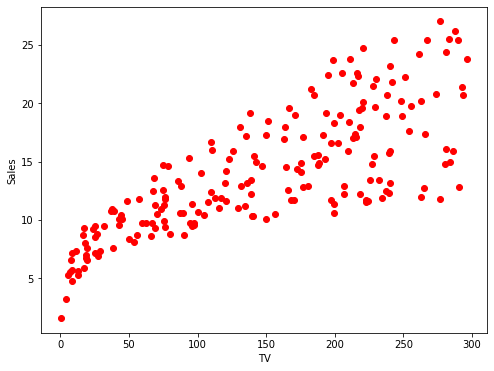

In [4]:
##CALCULO DE BETA,R2,INTERVALOS DE CONFIANZA... SIN LIBRERÍAS PARA UNA SOLA VARIABLE

import pandas as pd
import numpy as np

df_Advert = pd.read_csv('/content/drive/MyDrive/ColabNotebooksJuanJosé/DataSets/Advertising.csv') #dataframe

df_AdvertSN = df_Advert.drop(['Unnamed: 0'],axis=1)   #elimino columna no necesaria


X = df_AdvertSN['TV'] 
y = df_AdvertSN['sales']

import matplotlib.pyplot as plt #Para graficar las ventas respecto de la variable TV
plt.figure(1,figsize=(8,6))
plt.clf
plt.xlabel('TV')
plt.ylabel('Sales')
plt.scatter(X,y,color = 'r')
plt.show()


def estimate_coefficients(X,y): #Función que calcula los coeficientes b0, b1
  SS_xy = np.sum((X - X.mean())*(y - y.mean()))
  SS_yy = np.sum(pow((X - X.mean()),2))
  beta1 = SS_xy/SS_yy
  beta0 = y.mean() - beta1 * X.mean()
  return(beta0, beta1)

(b0 ,b1) = estimate_coefficients(X, y)
#print(b0,b1)


y_Pred = b0 + b1*X  #función predicha o calculada apartir de los coeficientes
#Suma de residuales cuadraticos
#RSS: la suma del "y" verdadero menos el "y" predicho, al cuadrado (suma de residuales al cuadrado)
RSS = np.sum((y - y_Pred)**2 )
#Error estandar residual
RSE = np.sqrt(RSS/(len(X)-2))
#Error estandar de b0 y b1
ES_b0 = np.sqrt(RSE*(1/len(X) + (pow(X.mean(),2)/(np.sum(pow(X - X.mean(),2))))))
ES_b1 = np.sqrt(RSE/(np.sum(pow(X - X.mean(),2))))

#Calculo de intervalos de confianza

a1 = b1 - 2*ES_b1 #Intervalo de confianza para Beta1
b1 = b1 + 2*ES_b1
interv_conB1 = [a1,b1]
  
a0 = b0 - 2*ES_b0 #Intervalo de confianza para Beta2
b0 = b0 + 2*ES_b0
interv_conB0 = [a0,b0]

#print(interv_conB1, interv_conB0)
# Exactitud del modelo R2 = (TSS-RSS/TSS)-----R2 = 1-(RSS/TSS)
TSS = np.sum(pow(y - y.mean(),2))
R2 = (TSS-RSS)/TSS


In [8]:
df = pd.DataFrame ({'MontoDelSeguro': [10,12,15,10,15,20,30,5,40,50,40,55],'IngresoAnual':[20,25,26,18,16,17,31,13,38,41,42,45]})
df.to_csv('df.csv', header=False, index=False)


In [ ]:
##CALCULO DE BETA,R2,INTERVALOS DE CONFIANZA... SIN LIBRERÍAS PARA UNA SOLA VARIABLE

from scipy import stats
beta1, beta0, r_value, p_value, std_err = stats.linregress(X,y)

stats.linregress(X,y) # slope: beta1, intercept: beta0, valor de r (rvalue): coeficiente de correlación entre X y Y, 
#error estandar residual (stderr): sirve para calcular el rango de valores donde se encuentra los valores reales de beta0 y beta1
#valor deprobalilidad (pvalue): determina si la correlación entre X y Y es significativa, si es cercana a cero o cero significa que existe evidencia suficiente 
#para decir que hay una correlación significativa entre X y Y   


# Se utiliza un valor de significacia de alpha = 0.05, si p>=alpha no existe evidencia suficiente para rechazar la hipótesis nula. 
# Cuando p< alpha,  existe evidencia sufuciente para rechazar la hipotesis nula.

# H0: p = 0 Significa que no hay una correlación significativa entre X y Y / H0: beta1 = 0
# H1: p != 0 (-1<p<1) Significa que hay una correlación significativa entre los valores de X y Y  / H1: beta1 != 0


import statsmodels.formula.api as sn
model_1Advert = sn.ols("sales ~ TV ",df_AdvertSN).fit();
print(model_1Advert.summary())
 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           1.47e-42
Time:                        13:49:37   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [ ]:
#Calculo por librería del modelo con dos variables

model_2Advert = sn.ols("sales ~ TV + radio + newspaper", df_AdvertSN).fit()
print(model_2Advert.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 25 Oct 2021   Prob (F-statistic):           1.58e-96
Time:                        11:38:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [ ]:
#INTRODUCIR VARIABLES CUALITATIVAS AL MODELO DE REGRESIÓN LINEAL

#Leer dataframe y borrar columnas inecesarias
df_Credit = pd.read_csv('Credit.csv')
df_Credit = df_Credit.drop(['Unnamed: 0'],axis = 1)
df_CreditSN = df_Credit.drop(['ID'],axis = 1) 
#print(df_Credit)

def transformToDummy(row):  #Función para crear la variable dummy
  if row['Gender'] == 'Female':
    return 1
  else:
    return 0

#Agregamos una columna x_dummy
df_CreditSN['x_dummy'] = df_CreditSN.apply(lambda row: transformToDummy(row),axis=1)
# print(df_CreditSN)


####################################################################################

#Otra forma de hacerlo:

# df_CreditSN['Gender'].factorize() 
# # Factorize(), me regreza una tupla y podemos acceder a sus datos de la siguiente forma:
# df_CreditSN['Gender'].factorize()[0]
# df_CreditSN['Gender'].factorize()[1]

# df_CreditSN['x_dummy'] = df_CreditSN['Gender'].factorize()[0] # Creamos la nueva columna:

# print(df_CreditSN)

model_3CreditDummy = sn.ols("Balance ~ x_dummy", df_CreditSN).fit()
print(model_3CreditDummy.summary())

      ID   Income  Limit  Rating  ...  Student  Married         Ethnicity Balance
0      1   14.891   3606     283  ...       No      Yes         Caucasian     333
1      2  106.025   6645     483  ...      Yes      Yes             Asian     903
2      3  104.593   7075     514  ...       No       No             Asian     580
3      4  148.924   9504     681  ...       No       No             Asian     964
4      5   55.882   4897     357  ...       No      Yes         Caucasian     331
..   ...      ...    ...     ...  ...      ...      ...               ...     ...
395  396   12.096   4100     307  ...       No      Yes         Caucasian     560
396  397   13.364   3838     296  ...       No       No  African American     480
397  398   57.872   4171     321  ...       No      Yes         Caucasian     138
398  399   37.728   2525     192  ...       No      Yes         Caucasian       0
399  400   18.701   5524     415  ...       No       No             Asian     966

[400 rows x 12 

In [ ]:
#AGREGAR 2 VARIABLES DUMMYS (PARA VARIABLE CUALITATIVA DE TRES NIVELES)

def transformToDummy1(row): #Función para variable dummy 1
  if row['Ethnicity'] == 'Asian':
    return 1
  else:
    return 0
  
def transformToDummy2(row): #función para variable dummy 2
  if row['Ethnicity'] == 'Caucasian':
    return 1
  else:
    return 0

#Agregamo las columnas al dataframe
df_CreditSN['x_dummy1'] = df_CreditSN.apply(lambda row: transformToDummy1(row),axis=1)
df_CreditSN['x_dummy2'] = df_CreditSN.apply(lambda row: transformToDummy2(row),axis=1)

#imprimimos el modelo
model_4AdvertDummy = sn.ols("Balance ~ x_dummy1 + x_dummy2", df2).fit()
print(model_4AdvertDummy.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Fri, 26 Mar 2021   Prob (F-statistic):              0.957
Time:                        05:16:31   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    531.0000     46.319     11.464      0.0

In [ ]:
#DEPENDENCIA ENTRE LAS VARIABLES

#Leemos el dataframe y borramos la columna no necesaria
df_AdvertDepVar = pd.read_csv('Advertising.csv')
df_AdvertDepVar = df_AdvertDepVar.drop(['Unnamed: 0'],axis=1)

#Imprimimos el modelo
model_3AdvertDepVar = sn.ols("sales ~ TV + radio + (radio*TV)",df).fit()
print(model_3AdvertDepVar.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):          6.68e-146
Time:                        05:19:26   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

In [ ]:
#DEPENDECIA ENTRE VARIABLES CUALITATIVAS

#cargamos el modelo anteriormente ya leido y borrado la columna inecesaria
#Tenemos que asegurarnos dde que no haya variables dummy ya calculada de otros ejercicios
df_Credit = pd.read_csv('Credit.csv')
df_Credit = df_Credit.drop(['Unnamed: 0'],axis = 1)
df_CreditSN = df_Credit.drop(['ID'],axis = 1) 
#print(df_CreditSN)

#Modelo sin interacción
df_CreditSN['x_dummy'] = df_CreditSN['Student'].factorize()[0]
model_CreditDummySNinteraccion = sn.ols("Balance ~ Income + x_dummy",df_CreditSN).fit()
print(model_CreditDummySNinteraccion.summary())

#Modelo con interacción
model_CreditDummyInteraccion = sn.ols("Balance ~ Income + x_dummy + (Income*x_dummy)",df_CreditSN).fit()
print(model_CreditDummyInteraccion.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     76.22
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           9.64e-29
Time:                        05:40:13   Log-Likelihood:                -2954.4
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     397   BIC:                             5927.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    211.1430     32.457      6.505      0.0

In [ ]:
#MODELO DE REGRESIÓN POLINOMIAL 
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as sn


df_Auto = pd.read_csv('Autos.csv')
#print(df_Auto)
df_AutoSN = df_Auto[df_Auto.horsepower != '?']
#print(df_AutoSN)

#Modelo lineal simple
#los datos del modelo son de tipo cadena "String" por lo que hay que convertirlos a tipo entero
#y lo agregamos al dataframe
df_AutoSN['horsepower'] = df_AutoSN.horsepower.astype(float)

model_AutoSnLineal = sn.ols(formula = 'mpg ~ horsepower', data = df_AutoSN).fit()
print(model_AutoSnLineal.summary())

#Modelo cuadratico
# Necesitamos definir Y y X para poder elevar al cuadrado la variable
X = np.array(df_AutoSN['horsepower'])
y = np.array(df_AutoSN['mpg'])

#Elevamos al cuadrado 
degree = 5
weights = np.polyfit(X,y, degree)
modelCuad = np.poly1d(weights)
model_AutoCuad = sn.ols(formula = 'y ~ modelCuad(X)',data = df_AutoSN).fit()
print(model_AutoCuad.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           7.03e-81
Time:                        14:11:50   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
